# Perceptron 

Khai báo thư viện 

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Khởi tạo dataset, các giá trị Y dựa vào X cộng thêm một số nhiễu 

In [0]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 

**Khởi tạo mô hình linear regression**

In [73]:
# Linear regression model
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))
model.compile(optimizer='sgd', loss='mse')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  


Khởi tạo các giá trị trọng số ban đầu

In [74]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))


Linear regression model is initialized with weight w: 0.03, b: 0.00


Huấn luyện mô hình

In [78]:
model.fit(trX, trY, nb_epoch=100, verbose=1)


Epoch 1/100
101/101 [==============================] - 0s 85us/step - loss: 0.8368
Epoch 2/100
101/101 [==============================] - 0s 92us/step - loss: 0.7964
Epoch 3/100
101/101 [==============================] - 0s 109us/step - loss: 0.7600
Epoch 4/100
101/101 [==============================] - 0s 65us/step - loss: 0.7269
Epoch 5/100
101/101 [==============================] - 0s 71us/step - loss: 0.6947
Epoch 6/100
101/101 [==============================] - 0s 53us/step - loss: 0.6676
Epoch 7/100
101/101 [==============================] - 0s 50us/step - loss: 0.6346
Epoch 8/100
101/101 [==============================] - 0s 62us/step - loss: 0.6016
Epoch 9/100
101/101 [==============================] - 0s 61us/step - loss: 0.5732
Epoch 10/100
101/101 [==============================] - 0s 60us/step - loss: 0.5454
Epoch 11/100
101/101 [==============================] - 0s 63us/step - loss: 0.5214
Epoch 12/100
101/101 [==============================] - 0s 59us/step - loss: 0.4984


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 24/100
101/101 [==============================] - 0s 78us/step - loss: 0.3152
Epoch 25/100
101/101 [==============================] - 0s 70us/step - loss: 0.3047
Epoch 26/100
101/101 [==============================] - 0s 64us/step - loss: 0.2958
Epoch 27/100
101/101 [==============================] - 0s 67us/step - loss: 0.2878
Epoch 28/100
101/101 [==============================] - 0s 65us/step - loss: 0.2794
Epoch 29/100
101/101 [==============================] - 0s 64us/step - loss: 0.2709
Epoch 30/100
101/101 [==============================] - 0s 72us/step - loss: 0.2624
Epoch 31/100
101/101 [==============================] - 0s 62us/step - loss: 0.2547
Epoch 32/100
101/101 [==============================] - 0s 68us/step - loss: 0.2477
Epoch 33/100
101/101 [==============================] - 0s 71us/step - loss: 0.2409
Epoch 34/100
101/101 [==============================] - 0s 69us/step - loss: 0.2356
Epoch 35/100
101/101 [==============================] - 0s 73us/step - loss:

In [109]:
# Print trained weights
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))


Linear regression model is trained with weight w: 0.03, b: -0.02


Vẽ biểu đồ đồ thị data gốc và mô hình 

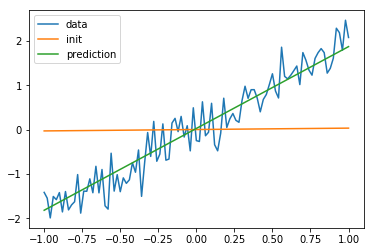

In [80]:
plt.plot(trX, trY, label='data')
plt.plot(trX, w_init*trX + b_init, label='init')
plt.plot(trX, w*trX + b, label='prediction')
plt.legend()
plt.show()


# Multilayer perceptron 

Chuẩn bị data 

https://www.kaggle.com/zalando-research/fashionmnist


In [0]:
from google.colab import files
files.upload()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!pwd 

/content


Copy data sang workspace

In [0]:
!cp 'drive/My Drive/PiMA/data/fashion-mnist_test.csv' fashion-mnist_test.csv
!cp 'drive/My Drive/PiMA/data/fashion-mnist_train.csv' fashion-mnist_train.csv

Khai báo một số thư viện cần thiết 

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical, np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import load_model


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Khai báo một số hằng số, vì ảnh có dạng 28x28 nên INPUT_SHAPE sẽ là 784

Số labels là 10 theo dataset quy định 

Load dữ liệu 


In [0]:
INPUT_SHAPE = 784
NUM_CATEGORIES = 10

LABEL_DICT = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

# LOAD THE RAW DATA
train_raw = pd.read_csv('fashion-mnist_train.csv').values
test_raw = pd.read_csv('fashion-mnist_test.csv').values

Sử dụng một số thao tác trên array để phân tập data 

m[:, n] tức là đang lấy vector cột thứ n của ma trận m

In [0]:
# split into X and Y, after one-hot encoding
train_x, train_y = (train_raw[:,1:], to_categorical(train_raw[:,0], num_classes = NUM_CATEGORIES))
test_x, test_y = (test_raw[:,1:], to_categorical(test_raw[:,0], num_classes = NUM_CATEGORIES))

# normalize the x data
train_x = train_x / 255
test_x = test_x / 255

Load mô hình có sẵn

In [0]:
model = load_model('mnist-linear.h5')


**Xây dựng mô hình duy nhất 1 perceptron **

In [83]:
model = Sequential()
model.add(Dense(input_dim=INPUT_SHAPE, output_dim=NUM_CATEGORIES, init='uniform', activation='linear'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="linear", units=10, kernel_initializer="uniform")`
  


**Xây dựng mô hình MLP cơ bản**

In [0]:
# BUILD THE MODEL
model = Sequential()

model.add(Dense(512, input_dim = INPUT_SHAPE))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(NUM_CATEGORIES))
model.add(Activation('softmax'))


Compile 

In [0]:

# compile it - categorical crossentropy is for multiple choice classification
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Visual mô hình 

In [101]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


callbacks dùng để ghi lại quá trình thay đổi 

In [0]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
        
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
        
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()


Huấn luyện mô hình 

In [95]:
history = LossHistory()
model.fit(train_x,
          train_y,
          epochs = 5,
          batch_size = 32,
          validation_data = (test_x, test_y),
          callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 33s 543us/step - loss: 0.5510 - acc: 0.8044 - val_loss: 0.4298 - val_acc: 0.8522
Epoch 2/5
60000/60000 [==============================] - 32s 526us/step - loss: 0.4552 - acc: 0.8464 - val_loss: 0.4718 - val_acc: 0.8545
Epoch 3/5
60000/60000 [==============================] - 31s 524us/step - loss: 0.4386 - acc: 0.8553 - val_loss: 0.4851 - val_acc: 0.8351
Epoch 4/5
60000/60000 [==============================] - 31s 520us/step - loss: 0.4279 - acc: 0.8604 - val_loss: 0.3773 - val_acc: 0.8779
Epoch 5/5
60000/60000 [==============================] - 31s 521us/step - loss: 0.4139 - acc: 0.8683 - val_loss: 0.4276 - val_acc: 0.8666


Độ chính xác của mô hình

In [96]:
score = model.evaluate(test_x, test_y, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.4275770235776901
Test accuracy: 0.8666


Đồ thị biểu diễn sự thay đổi sai số của mô hình

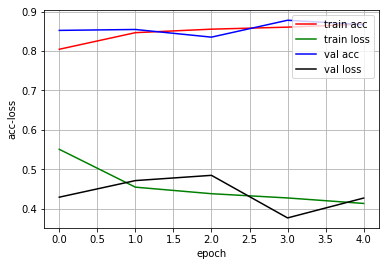

In [97]:
history.loss_plot('epoch')

Chuyển thành số nguyên và hiển thị dự đoán với tập test

In [105]:
predict = model.predict(test_x)
predict = np.exp(predict)
predict = predict.astype(int)
print(predict)


[[  0   0 100 ...   0   0   0]
 [  0   0   9 ...   0   0   0]
 [  0   0   7 ...   0   0   0]
 ...
 [  0   0  92 ...   0   0   0]
 [  0   0 419 ...   0   0   0]
 [  0   0 267 ...   0   0   0]]


Lưu file csv 

In [0]:
pred2 = pd.DataFrame((predict))
pred2.to_csv('sol2.csv')


Lưu mô hình 

In [0]:
model.save('mnist-linear.h5')

# Setup virtual machine 

Thiết lập tài khoản 

In [1]:
%%bash
adduser admin 

Adding user `admin' ...
Adding new group `admin' (1000) ...
Adding new user `admin' (1000) with group `admin' ...
Creating home directory `/home/admin' ...
Copying files from `/etc/skel' ...
Try again? [y/N] Changing the user information for admin
Enter the new value, or press ENTER for the default
	Full Name []: 	Room Number []: 	Work Phone []: 	Home Phone []: 	Other []: Is the information correct? [Y/n] 

Enter new UNIX password: Retype new UNIX password: passwd: Authentication token manipulation error
passwd: password unchanged
Use of uninitialized value $answer in chop at /usr/sbin/adduser line 591.
Use of uninitialized value $answer in pattern match (m//) at /usr/sbin/adduser line 592.
Use of uninitialized value $answer in chop at /usr/sbin/adduser line 621.
Use of uninitialized value $answer in pattern match (m//) at /usr/sbin/adduser line 622.


Thiết lập mật khẩu 

In [2]:
%%bash
usermod -aG sudo admin
passwd admin
123456
123456

Enter new UNIX password: Retype new UNIX password: passwd: password updated successfully


Load data từ google drive

Sau khi chạy cell này, các em làm theo hướng dẫn, lấy token từ google paste vào ô trắng hiện lên 

In [0]:
from google.colab import drive
drive.mount('/home/admin/drive')

Khởi động ssh 

In [0]:
! service ssh start

Khởi tạo token 

In [0]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -u ngrok-stable-linux-amd64.zip 
! ./ngrok authtoken 7pkxYrr9wzSevuzF8YuRj_3gmw4RNFDGFeJWShcvCCF



Khởi chạy máy ảo 

In [0]:
! ./ngrok tcp 22


Sau khi khởi chạy máy ảo, lệnh trên sẽ không dừng lại, các em cần mở terminal lên, kết nối vào ssh theo những lệnh dưới đây 

In [0]:
ssh admin@<tunnel> -p <port> 

#trong đó tunnel là phần trong 0. trở đi trong ngrok tụi em đã khởi tạo 
#port là phần từ : trở đi trong status ( giải thích kĩ hơn ở slide )
#Kết thúc dòng lệnh này, các em đã chính thức kết nối với máy chủ 

export PATH=/opt/bin:/usr/local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
export LD_LIBRARY_PATH=/usr/lib64-nvidia
export PYTHONPATH=/env/python

sudo apt-get install software-properties-common
sudo apt install vim tmux
sudo apt install fuse

#sau khi khởi chạy, các em làm việc trên terminal như bình thường 